In [1]:
import os
from classes.VAE import VAE

import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import MNIST
from torchvision.transforms import Compose,ToTensor,Resize,PILToTensor
from torchvision.io import read_image
from torchsummary import summary

from torch import distributions as D
import wandb

from imutils import paths
import matplotlib.pyplot as plt
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: matteoferrante (use `wandb login --relogin` to force relogin)


True

In [19]:
encoder_architecture=[[0,64],[0,128],[0,128]]
decoder_architecture=[[0,64],[0,128]]

latent_dim=50
input_dim=(1,28,28)


config={"dataset":"MNIST", "type":"VAE","encoder_architecture":encoder_architecture,"decoder_architecture":decoder_architecture}
config["latent_dim"]=latent_dim
config["input_dim"]=input_dim

model=VAE(input_dim=input_dim,latent_dim=latent_dim,encoder_architecture=encoder_architecture,decoder_architecture=decoder_architecture)

#model=VAE(input_dim,latent_dim)

In [20]:
images_dir=r"C:\Users\matte\Dataset\tor_vergata\Dataset\Img\img_align_celeba"
#images_dir=r"/home/matteo/NeuroGEN/Dataset/Img/img_align_celeba"

#other important definitions

EPOCHS=10
BS=512
INIT_LR=1e-4

config["epochs"]=EPOCHS
config["BS"]=BS
config["init_lr"]=INIT_LR


In [21]:
summary(model.encoder,(1,28,28),device="cpu")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           1,088
      ConvResBlock-2           [-1, 64, 14, 14]               0
            Conv2d-3            [-1, 128, 7, 7]         131,200
      ConvResBlock-4            [-1, 128, 7, 7]               0
            Conv2d-5            [-1, 128, 3, 3]         262,272
      ConvResBlock-6            [-1, 128, 3, 3]               0
           Flatten-7                 [-1, 1152]               0
            Linear-8                   [-1, 50]          57,650
            Linear-9                   [-1, 50]          57,650
Total params: 509,860
Trainable params: 509,860
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.31
Params size (MB): 1.94
Estimated Total Size (MB): 2.26
-------------------------------------------

In [22]:
summary(model.decoder,(latent_dim,),device="cpu")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 3136]         159,936
         Unflatten-2             [-1, 64, 7, 7]               0
   ConvTranspose2d-3           [-1, 64, 14, 14]          65,600
             PReLU-4           [-1, 64, 14, 14]               1
ConvTransposeResBlock-5           [-1, 64, 14, 14]               0
   ConvTranspose2d-6          [-1, 128, 28, 28]         131,200
             PReLU-7          [-1, 128, 28, 28]               1
ConvTransposeResBlock-8          [-1, 128, 28, 28]               0
   ConvTranspose2d-9            [-1, 1, 28, 28]           1,153
          Sigmoid-10            [-1, 1, 28, 28]               0
Total params: 357,891
Trainable params: 357,891
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 2.64
Params size (MB): 1.37
Estim

## Dataloaders

In [23]:
transform=Compose([ToTensor()])

train_dataset=MNIST('mnist_train', train=True, download=True,
                             transform=transform)
test_dataset=MNIST('mnist_test', train=False, download=True,
                             transform=transform)


In [24]:
train_dataloader=DataLoader(train_dataset,batch_size=BS,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size=BS,shuffle=True)


## Train Loop

In [25]:
base_path="models/vae_mnist"
os.makedirs(base_path,exist_ok=True)

In [26]:
# Get cpu or gpu device for training.
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda:0 device


In [27]:
wandb.init(project="NeuroGEN_Pytorch",config=config)

kl_loss,█▆▆▆▆▄▃▂▁
loss,█▂▂▁▁▁▁▁▁
recon_loss,█▂▂▁▁▁▁▁▁
val_kl_loss,▃▇█▇▅▄▄▂▁
val_loss,█▄▃▃▂▂▂▁▁
val_recon_loss,█▄▃▂▂▂▁▁▁
kl_loss,0.00368
loss,0.05797
recon_loss,0.05429
val_kl_loss,0.00368
val_loss,0.05772


Val 0: 100%|███████████| 20/20 [00:01<00:00, 13.84batch/s, val_kl_loss=0.00956, val_loss=0.0666, val_recon_loss=0.0578]


(272, 28, 28, 1) (100, 28, 28, 3)


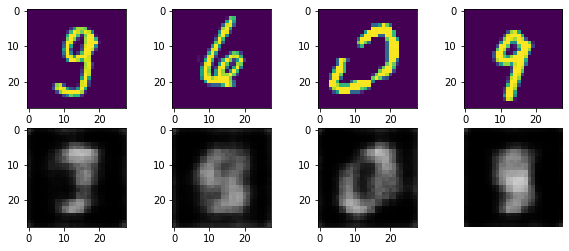

Val 1: 100%|████████████| 20/20 [00:01<00:00, 13.65batch/s, val_kl_loss=0.0133, val_loss=0.0579, val_recon_loss=0.0464]


(272, 28, 28, 1) (100, 28, 28, 3)


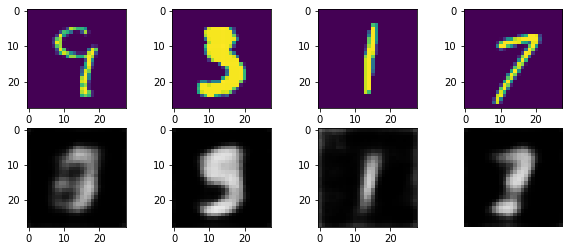

Val 2: 100%|████████████| 20/20 [00:01<00:00, 12.78batch/s, val_kl_loss=0.0149, val_loss=0.0556, val_recon_loss=0.0402]


(272, 28, 28, 1) (100, 28, 28, 3)


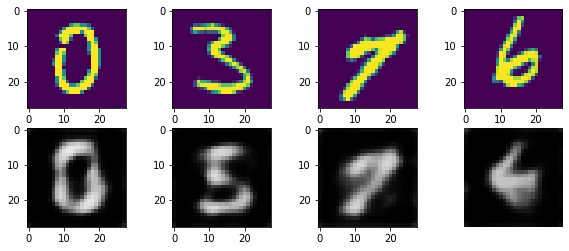

Val 3: 100%|████████████| 20/20 [00:01<00:00, 14.48batch/s, val_kl_loss=0.0155, val_loss=0.0533, val_recon_loss=0.0354]


(272, 28, 28, 1) (100, 28, 28, 3)


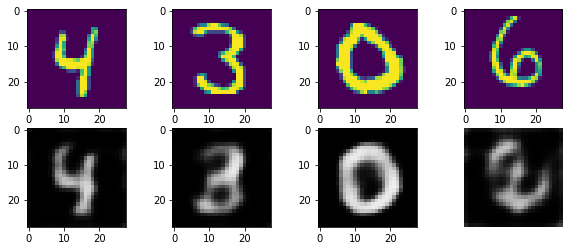

Val 4: 100%|████████████| 20/20 [00:01<00:00, 13.54batch/s, val_kl_loss=0.0171, val_loss=0.0505, val_recon_loss=0.0338]


(272, 28, 28, 1) (100, 28, 28, 3)


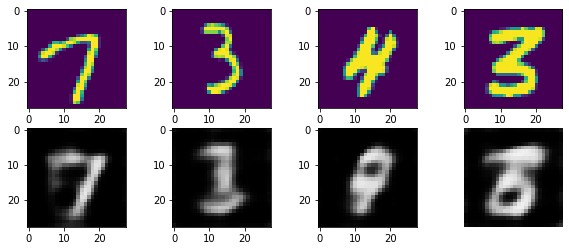

Val 5: 100%|█████████████| 20/20 [00:01<00:00, 13.62batch/s, val_kl_loss=0.0162, val_loss=0.0481, val_recon_loss=0.033]


(272, 28, 28, 1) (100, 28, 28, 3)


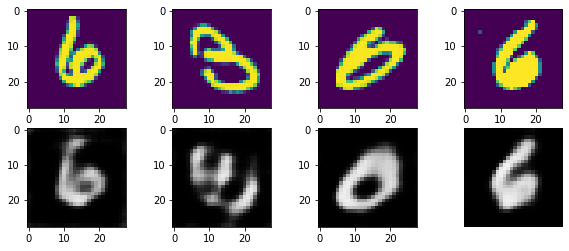

Val 6: 100%|████████████| 20/20 [00:01<00:00, 13.02batch/s, val_kl_loss=0.0164, val_loss=0.0467, val_recon_loss=0.0313]


(272, 28, 28, 1) (100, 28, 28, 3)


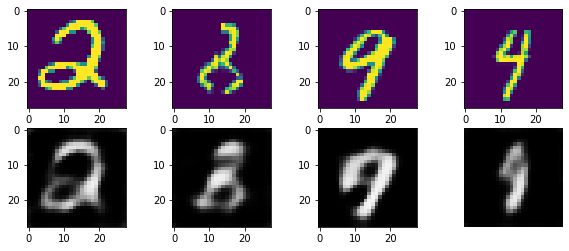

Val 7: 100%|████████████| 20/20 [00:01<00:00, 12.84batch/s, val_kl_loss=0.0155, val_loss=0.0463, val_recon_loss=0.0295]


(272, 28, 28, 1) (100, 28, 28, 3)


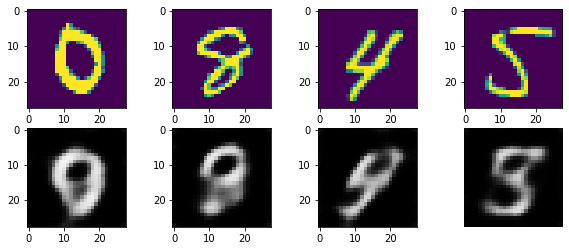

Val 8: 100%|████████████| 20/20 [00:01<00:00, 13.94batch/s, val_kl_loss=0.0161, val_loss=0.0454, val_recon_loss=0.0287]


(272, 28, 28, 1) (100, 28, 28, 3)


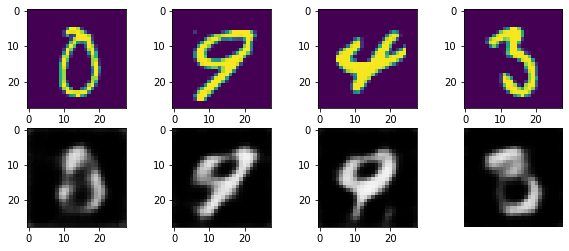

Val 9: 100%|████████████| 20/20 [00:01<00:00, 14.56batch/s, val_kl_loss=0.0157, val_loss=0.0448, val_recon_loss=0.0303]


(272, 28, 28, 1) (100, 28, 28, 3)


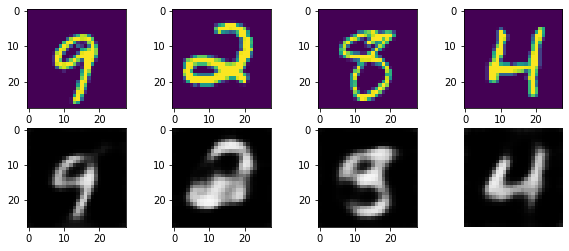

In [28]:

#model.load_state_dict(torch.load(r"models/vae/model.ckp"))

optimizer=torch.optim.Adam(model.parameters(),lr=INIT_LR)
model.to(device)

model.fit(train_dataloader=train_dataloader,val_dataloader=test_dataloader,epochs=EPOCHS,optimizer=optimizer,device=device,wandb_log=True,save_model=base_path,early_stop=3)

In [29]:
numbers={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}

for x,y in train_dataset:
    numbers[y].append(x)


In [42]:


def encode(x):

    z_mean,z_log_var = model.encoder(x)


    model.q_z = D.normal.Normal(z_mean, torch.exp(0.5 * z_log_var))

    device=z_mean.get_device()

    # sample z from it
    z = model.q_z.rsample()

    return z

In [44]:
z_zeros=encode(torch.stack(numbers[0]).to(device))

z_nines=encode(torch.stack(numbers[9]).to(device))


In [50]:
z_zeros_mean=z_zeros.mean(0)
z_nines_mean=z_nines.mean(0)

In [61]:
## compute the similarity between the mean values of z for zeros and the z_zero_mean vs z_nines_mean

cos=torch.nn.CosineSimilarity(0)

similarity_00=[]
similarity_09=[]
for i in z_zeros:
    
    similarity_00.append(cos(i,z_zeros_mean))
    similarity_09.append(cos(i,z_nines_mean))
    

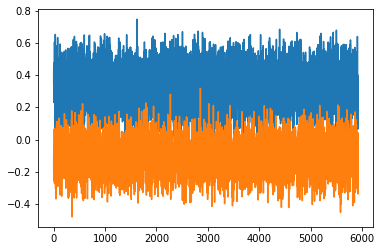

In [64]:
plt.plot(similarity_00)
plt.plot(similarity_09)